In [1]:
# import packages 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import requests
from scipy.signal import find_peaks

In [2]:
file_path = './hohonu_key.txt'  # key file in same directory

try:
    with open(file_path, 'r') as file:
        key = file.read()
        print("API Key:", key)
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

API Key: f20cc902a6ce182a35ffda595df9c171fba1e4ee


### Station Info

In [3]:
import requests

url = "https://dashboard.hohonu.io/api/v1/stations/node-10075"

headers = {
    "accept": "application/json",
    "Authorization": key
}

station_info = requests.get(url, headers=headers)

station_info.text

'{"id":"hohonu-118","station_type":"Hohonu","latitude":43.8943,"longitude":-69.8148,"status":"Active","local_mllw":"-4.863033710031814","download_permision":true,"subscribed":false,"distance":{"value":0.0,"unit":"meters"},"images":null,"access":true,"current_datum":"MLLW","datums":[{"value":"MLLW","label":"MLLW"},{"value":"MHHW","label":"MHHW"},{"value":"NAVD","label":"NAVD88"},{"value":"D2W_FEET","label":"Local Measure (feet)"},{"value":"D2W","label":"Local Measure (mm)"}],"station_id":"hohonu-118","uuid":"17044513-e846-4afc-9efc-56b5d2b4903f","organization":"GMRI","notes":"","location":"Maine Maritime Museum, Kennebec River, Bath, ME","installation_date":"2022-11-08T04:00:00Z","decommissioned_date":null,"nnoaa_station":"8418150","custom_nearest_noaa":null,"nearest_noaa_subordinate_observed":null,"nearest_noaa_subordinate_prediction":null,"d2w_begin_caution":null,"d2w_begin_emergency":null,"navd88_begin_caution":null,"navd88_begin_emergency":null,"mllw_begin_caution":null,"mllw_begin_

### Station Statistics

In [4]:
GMRIstations = {
    'Portland - GMRI Pier':'10038',
    'Portland - Back Cove':'10076',
    'Bath':'10075',
    'St. George - Southern Island':'10072',
    'Boothbay Harbor':'10214',
    'Chebeague Island':'10202',
    'Portland - Fore River':'10237',
    'St. George - Port Clyde':'10211',
    'Machias - Ultrasonic':'10203',
    'Machias - Radar':'12002'
    
}
                

### API Request for data - saves raw data as a CSV so turn this cell on for a new call

In [5]:
sensorID = GMRIstations['Bath']

#define start/end dates: set to 00:00Z for both dates (i.e. will include only one measurement on end date but this matches NOAA)
start_date = '2022-11-11'
end_date = '2023-10-10'

# cleaned data?
clean = 'false'

#NAVD88
url1 = "https://dashboard.hohonu.io/api/v1/stations/node-"+sensorID+"/statistic/?from="+start_date+"%2000%3A00&to="+end_date+"%2000%3A00&datum=navd&cleaned="+clean+"&tz=0&format=json"

#MLLW
url2 = "https://dashboard.hohonu.io/api/v1/stations/node-"+sensorID+"/statistic/?from="+start_date+"%2000%3A00&to="+end_date+"%2000%3A00&datum=mllw&cleaned="+clean+"&tz=0&format=json"

#D2W
url3 = "https://dashboard.hohonu.io/api/v1/stations/node-"+sensorID+"/statistic/?from="+start_date+"%2000%3A00&to="+end_date+"%2000%3A00&datum=d2w&cleaned="+clean+"&tz=0&format=json"

headers = {"Authorization": key}

response1 = requests.get(url1, headers=headers)
print(response1.status_code)
response2 = requests.get(url2, headers=headers)
print(response2.status_code)
response3 = requests.get(url3, headers=headers)
print(response3.status_code)
#########

df1 = response1.json()
df2 = response2.json()
df3 = response3.json()

# selecting individual time series from within the JSON dictionary
time = df1['data'][0]
htime = pd.DatetimeIndex(np.array(time)) # put Hohonu time values into an array with Datetime form

h_obs1 = df1['data'][1]
h_obs2 = df2['data'][1]
h_obs3 = df3['data'][1]

hobs1 = np.array(h_obs1, dtype = float)*0.3048 # put into an array and convert to metric
hobs2 = np.array(h_obs2, dtype = float)*0.3048
hobs3 = np.array(h_obs3, dtype = float)*0.001 # this comes in as mm -> convert to meters


data = {'date':time,'NAVD': hobs1, "MLLW": hobs2, "d2w": hobs3}
hohonu = pd.DataFrame(data=data)

hohonu.to_csv("Bath_hohonu_raw.csv")

200
200
200


In [6]:
df = pd.read_csv("Bath_hohonu_raw.csv") # Load in CSV
hobs1 = df.NAVD
hobs2 = df.MLLW
hobs3 = df.d2w
time = df.date

In [7]:
hdiff = hobs2-hobs1
print(hdiff)

0        1.41732
1        1.41732
2        1.41732
3        1.41732
4        1.41732
          ...   
79695    1.41732
79696    1.41732
79697    1.41732
79698    1.41732
79699        NaN
Length: 79700, dtype: float64


## Cleaning Hohonu Bath data (NAVD)

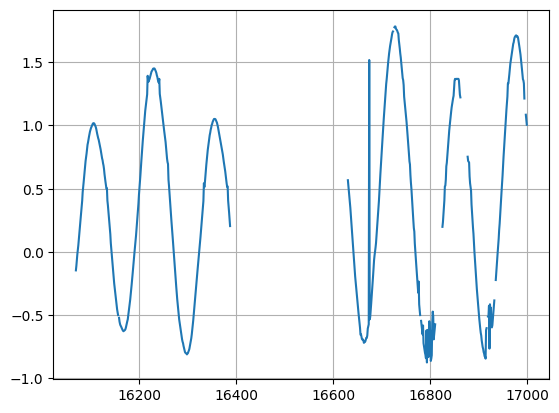

In [8]:
hobs11 = hobs1.values.copy()

hobs11[255:311] = np.nan
hobs11[340:390] = np.nan
hobs11[410:432] = np.nan
hobs11[663:680] = np.nan
hobs11[730:733] = np.nan
hobs11[740:743] = np.nan

hobs11[1035:1051] = np.nan
hobs11[1420:1455] = np.nan

hobs11[3400:3426] = np.nan
hobs11[3432:3440] = np.nan
hobs11[3885:3922] = np.nan
hobs11[3924:3940] = np.nan

hobs11[4030:4035] = np.nan
hobs11[4597:4650] = np.nan

hobs11[5250:5283] = np.nan

hobs11[6128:6135] = np.nan
hobs11[6370:6380] = np.nan

hobs11[8470:8495] = np.nan
hobs11[8640:8655] = np.nan
hobs11[8595:8605] = np.nan

hobs11[9945:9967] = np.nan
hobs11[9968:9998] = np.nan

hobs11[10080:10111] = np.nan
hobs11[10700:10742] = np.nan
hobs11[10230:10240] = np.nan
hobs11[10335:10390] = np.nan
hobs11[10450:10490] = np.nan
hobs11[10595:10605] = np.nan

hobs11[11030:11105] = np.nan
hobs11[11106:11150] = np.nan
hobs11[11160:11207] = np.nan
hobs11[11208:11241] = np.nan
hobs11[11247:11260] = np.nan
hobs11[11480:11499] = np.nan
hobs11[11520:11540] = np.nan
hobs11[11680:11710] = np.nan

hobs11[13080:13085] = np.nan
hobs11[13200:13220] = np.nan

hobs11[13510] = 1.1
hobs11[13600] = -0.5 
hobs11[13650] = 1.5

hobs11[13700:13706] = np.nan
hobs11[13820] = -0.5
hobs11[13910] = 1.2
hobs11[13950] = -0.7

hobs11[14935:14940] = np.nan

hobs11[14935:14940] = np.nan

hobs11[15023:15070] = np.nan
hobs11[15060] = -0.2
hobs11[15150:15200] = np.nan
hobs11[15370:15385] = np.nan
hobs11[15585] = -0.55
hobs11[15650] = 0.65

hobs11[16020] = -0.5
hobs11[16410] = -.75
hobs11[16470] = 1.6
hobs11[16540] = -0.7
hobs11[16600] = 1.3
hobs11[16670:16680] = np.nan
hobs11[16790:16810] = np.nan
hobs11[16910:16930] = np.nan

hobs11[17020:17045] = np.nan
hobs11[17160:17175] = np.nan
hobs11[17295:17305] = np.nan
hobs11[17580] = -0.5
hobs11[17680] = 1.4
hobs11[17790:17805] = np.nan
hobs11[17900:17920] = np.nan

hobs11[18400:18410] = np.nan

hobs11[19230] = -.65

hobs11[20160:20170] = np.nan
hobs11[20247:20310] = np.nan

hobs11[21502:21540] = np.nan
hobs11[21735:21760] = np.nan

hobs11[22235:22260] = np.nan

hobs11[24240:24255] = np.nan
hobs11[24625:24635] = np.nan

hobs11[25620:25630] = np.nan

hobs11[26715:26740] = np.nan
hobs11[26980:27010] = np.nan

hobs11[27340:27350] = np.nan

hobs11[29530:29580] = np.nan
hobs11[29670:29678] = np.nan
hobs11[29685:29750] = np.nan
hobs11[29880:29905] = np.nan

hobs11[30130:30152] = np.nan

hobs11[32200:32210] = np.nan

hobs11[33920:33950] = np.nan

hobs11[35655:35680] = np.nan
hobs11[35890:35915] = np.nan

hobs11[39445:39470] = np.nan
hobs11[39525:39560] = np.nan

hobs11[40870:40920] = np.nan

hobs11[42115:42130] = np.nan

hobs11[43795:43820] = np.nan

hobs11[44995:45050] = np.nan

hobs11[45600:45690] = np.nan

hobs11[46160:46175] = np.nan

hobs11[48355:48370] = np.nan
hobs11[48605:48620] = np.nan
hobs11[48760:48785] = np.nan

hobs11[50755:50771] = np.nan
hobs11[51970:51985] = np.nan

hobs11[52450:52485] = np.nan

hobs11[53185:53215] = np.nan

hobs11[54975:54995] = np.nan

hobs11[56030:56070] = np.nan
hobs11[56270:56305] = np.nan
hobs11[56770:56805] = np.nan

hobs11[57710:57730] = np.nan

hobs11[58890:58910] = np.nan

hobs11[59230:59290] = np.nan
hobs11[59385:59395] = np.nan
hobs11[59400:59430] = np.nan

hobs11[61880:61895] = np.nan

hobs11[62490:62510] = np.nan

hobs11[63000:63020] = np.nan

hobs11[63240:63255] = np.nan
hobs11[63470:63515] = np.nan
hobs11[63725:63775] = np.nan
hobs11[63840:63895] = np.nan
hobs11[63960:63990] = np.nan

hobs11[66120:66140] = np.nan

hobs11[67200:67225] = np.nan

hobs11[68795:68858] = np.nan

hobs11[70050:70080] = np.nan
hobs11[70185:70195] = np.nan
hobs11[70250] = 1.3
hobs11[70310] = -1
hobs11[70400] = 1.5
hobs11[70440:70460] = np.nan
hobs11[70690:70720] = np.nan
hobs11[70920:70940] = np.nan

hobs11[71125:71145] = np.nan
hobs11[71180:71205] = np.nan

hobs11[72560:72580] = np.nan

hobs11[73415:73425] = np.nan

hobs11[74035:74080] = np.nan
hobs11[74285:74315] = np.nan

hobs11[77835:77850] = np.nan

hobs11[79450:79475] = np.nan



##########



##### SLICE PARAMETER #####
q = slice(16000,17000)
###########################

# plt.plot(htime[12000:13000], hobs11[12000:13000])
plt.plot(hobs1[q])
plt.grid()



In [9]:
hobs11 = pd.DataFrame(hobs11)
hobs1a = pd.DataFrame(hobs1)

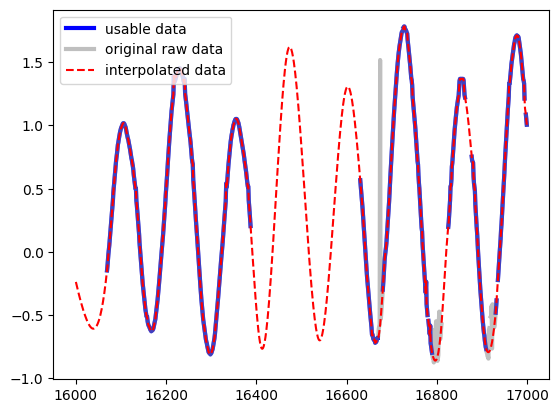

In [10]:
hobsint = hobs11.interpolate(method='polynomial', order=3)
# hobsint2 = hobs11[q].interpolate(method='polynomial', order=2)
plt.plot(hobs11[q], c = 'b', lw = 3, label = 'usable data')
plt.plot(hobs1a[q], c = '0.5', lw = 3, alpha = 0.5, label = 'original raw data')
plt.plot(hobsint[q], c= 'r', ls = '--', label = 'interpolated data')
plt.legend(loc = 'upper left')
plt.savefig("cleaning_example.png")

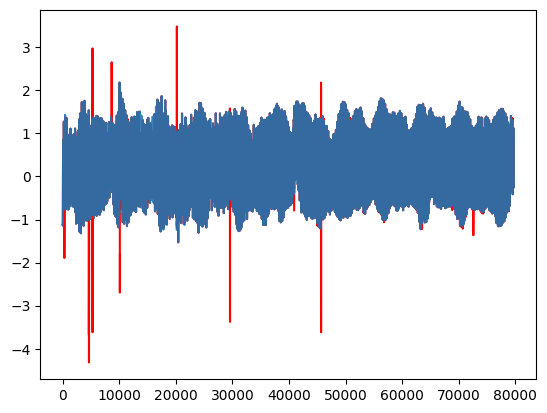

In [11]:
plt.plot(hobs1, c = 'r')
plt.plot(hobsint, alpha = 0.9)

## Saving CSV to use in calculating datums (From NOAA CO-OPS)

In [12]:
df = pd.DataFrame(hobsint.values, index = time,  columns = ['WL'])

In [13]:
df.index = pd.to_datetime(df.index)

In [14]:
# Resample the DataFrame to 6-minute intervals and insert missing rows with empty values
resampled_df = df.resample('6T').asfreq()

In [15]:
# round everything to 3 decimals
wl= []
for obs in resampled_df.WL.values:
    wl.append(np.round(obs.data,3))
resampled_df.WL = wl
time_resamp = resampled_df.index.strftime('%m/%d/%Y %H:%M')
df = resampled_df.set_index(time_resamp)

In [16]:
df.head()

,WL
date,
11/11/2022 00:00,-1.122
11/11/2022 00:06,-1.125
11/11/2022 00:12,-1.134
11/11/2022 00:18,-1.137
11/11/2022 00:24,-1.140


In [17]:
# save final data as CSV
df.to_csv('bath_cleaned.csv', header = ['wl'])

Calculate datums using NOAA CO-OPS data calculator: https://access.co-ops.nos.noaa.gov/datumcalc/